# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key

## Step 2: Download the Kaggle dataset using the kaggle python library

### Download and explore dataset

In [1]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

  0%|                                                | 0.00/189k [00:00<?, ?B/s]
100%|█████████████████████████████████████████| 189k/189k [00:00<00:00, 466MB/s]
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from autogluon.tabular import TabularPredictor

In [3]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv('train.csv')
train['datetime'] = pd.to_datetime(train['datetime'])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe().drop(['datetime'], axis=1).round(2)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.00,10886.00,10886.00,10886.00,10886.00,10886.00,10886.00,10886.00,10886.00,10886.00,10886.00
mean,2.51,0.03,0.68,1.42,20.23,23.66,61.89,12.80,36.02,155.55,191.57
min,1.00,0.00,0.00,1.00,0.82,0.76,0.00,0.00,0.00,0.00,1.00
25%,2.00,0.00,0.00,1.00,13.94,16.66,47.00,7.00,4.00,36.00,42.00
50%,3.00,0.00,1.00,1.00,20.50,24.24,62.00,13.00,17.00,118.00,145.00
75%,4.00,0.00,1.00,2.00,26.24,31.06,77.00,17.00,49.00,222.00,284.00
max,4.00,1.00,1.00,4.00,41.00,45.46,100.00,57.00,367.00,886.00,977.00
std,1.12,0.17,0.47,0.63,7.79,8.47,19.25,8.16,49.96,151.04,181.14


In [5]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv('test.csv')
test['datetime'] = pd.to_datetime(test['datetime'])
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [6]:
# Same thing as train and test dataset
submission = pd.read_csv('sampleSubmission.csv')
submission['datetime'] = pd.to_datetime(submission['datetime'])
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [7]:
train = train.drop(['casual', 'registered'], axis=1)

In [8]:
predictor = TabularPredictor(
    label='count',
    problem_type='regression',
    eval_metric='root_mean_squared_error',
    path='models',
).fit(
    train_data=train,
    time_limit=60*10,
    presets='best_quality'
)

Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.4.0
Python Version:     3.12.11
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 25.0.0: Wed Sep 17 21:41:23 PDT 2025; root:xnu-12377.1.9~141/RELEASE_ARM64_T8122
CPU Count:          8
Memory Avail:       2.66 GB / 8.00 GB (33.2%)
Disk Space Avail:   45.81 GB / 228.27 GB (20.1%)
Presets specified: ['best_quality']
Using hyperparameters preset: hyperparameters='zeroshot'
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Co

(_ray_fit pid=23557) [1000]	valid_set's rmse: 130.657


(_dystack pid=23540) 	-131.9758	 = Validation score   (-root_mean_squared_error)
(_dystack pid=23540) 	4.85s	 = Training   runtime
(_dystack pid=23540) 	2.44s	 = Validation runtime
(_dystack pid=23540) Fitting model: LightGBM_BAG_L1 ... Training model for up to 90.42s of the 139.88s of remaining time.
(_dystack pid=23540) 	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (8 workers, per: cpus=1, gpus=0, memory=0.47%)


(_ray_fit pid=23561) [1000]	valid_set's rmse: 129.274 [repeated 37x across cluster] (Ray deduplicates logs by default. Set RAY_DEDUP_LOGS=0 to disable log deduplication, or see https://docs.ray.io/en/master/ray-observability/user-guides/configure-logging.html#log-deduplication for more options.)


(_dystack pid=23540) 	-131.8496	 = Validation score   (-root_mean_squared_error)
(_dystack pid=23540) 	1.33s	 = Training   runtime
(_dystack pid=23540) 	0.6s	 = Validation runtime
(_dystack pid=23540) Fitting model: RandomForestMSE_BAG_L1 ... Training model for up to 87.03s of the 136.48s of remaining time.
(_dystack pid=23540) 	-119.5502	 = Validation score   (-root_mean_squared_error)
(_dystack pid=23540) 	1.58s	 = Training   runtime
(_dystack pid=23540) 	0.23s	 = Validation runtime
(_dystack pid=23540) Fitting model: CatBoost_BAG_L1 ... Training model for up to 85.11s of the 134.56s of remaining time.
(_dystack pid=23540) 	Memory not enough to fit 8 folds in parallel. Will train 4 folds in parallel instead (Estimated 17.94% memory usage per fold, 71.76%/80.00% total).
(_dystack pid=23540) 	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=2, gpus=0, memory=17.94%)
(_dystack pid=23540) 	-131.496	 = Validation score   (-root_mea

### Review AutoGluon's training run with ranking of models that did the best.

In [9]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3 -112.559639  root_mean_squared_error      19.632729  318.841658                0.000470           0.126219            3       True         22
1   NeuralNetFastAI_BAG_L2 -113.541590  root_mean_squared_error      19.048149  258.781465                0.168544          14.802840            2       True         17
2          CatBoost_BAG_L2 -114.537450  root_mean_squared_error      18.897143  256.624357                0.017538          12.645732            2       True         15
3     CatBoost_r177_BAG_L2 -114.566438  root_mean_squared_error      18.958535  255.603407                0.078930          11.624782            2       True         21
4        LightGBMXT_BAG_L2 -114.670918  root_mean_squared_error      19.338754  245.993483   

/opt/anaconda3/envs/autogluon-test/lib/python3.12/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'NeuralNetTorch_BAG_L1': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'LightGBMLarge_BAG_L1': 'StackerEnsembleModel_LGB',
  'CatBoost_r177_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L2': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L2': 'StackerEnsembleM

### Create predictions from test dataset

In [10]:
predictions = predictor.predict(test)

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [11]:
predictions[predictions < 0] = 0

### Set predictions to submission dataframe, save, and submit

In [12]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [13]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100%|█████████████████████████████████████████| 188k/188k [00:01<00:00, 102kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [14]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName        date                        description           status                     publicScore  privateScore  
--------------  --------------------------  --------------------  -------------------------  -----------  ------------  
submission.csv  2025-09-30 05:54:53.887000  first raw submission  SubmissionStatus.COMPLETE  1.40096      1.40096       


#### Initial score of `1.40096`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


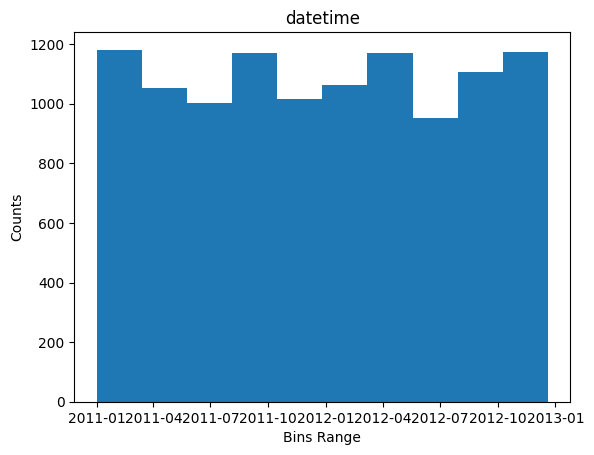

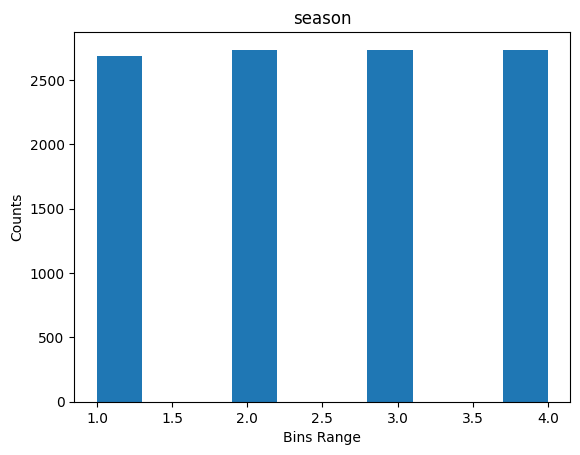

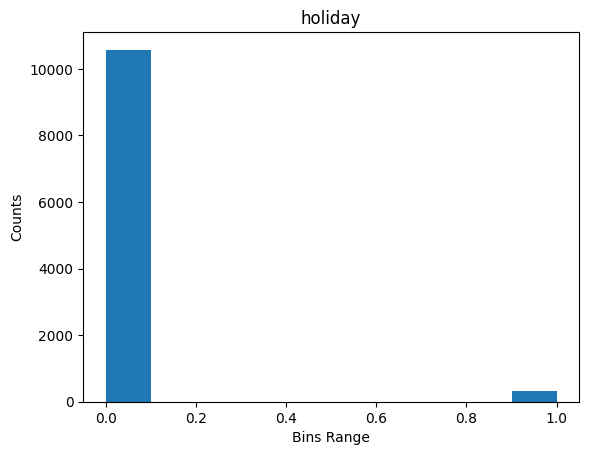

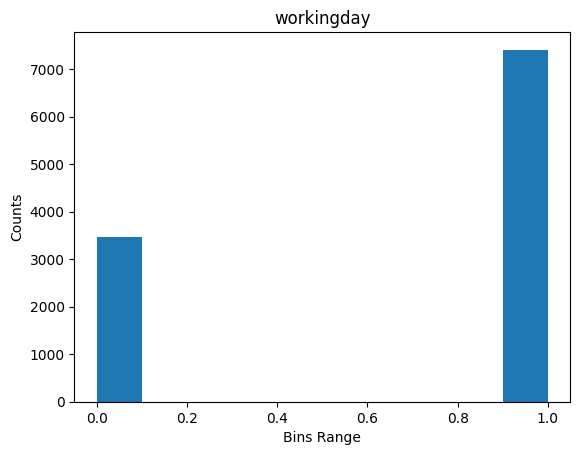

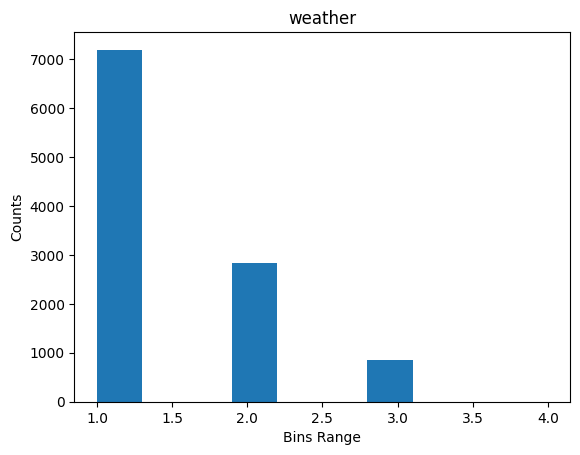

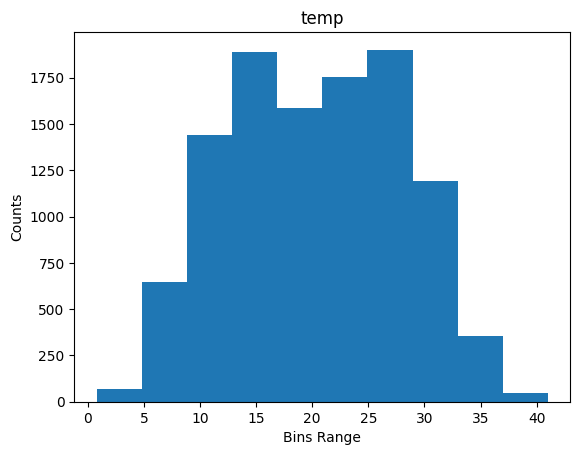

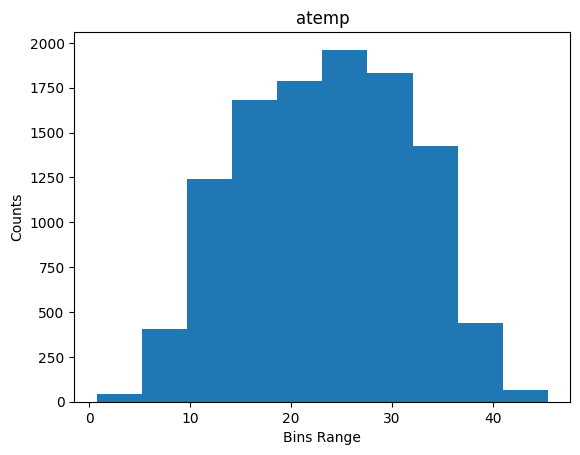

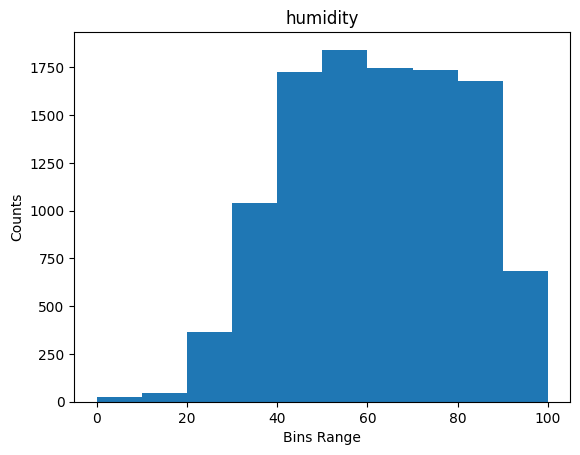

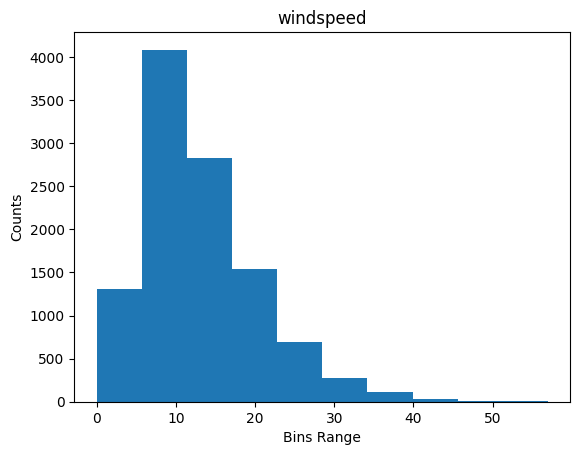

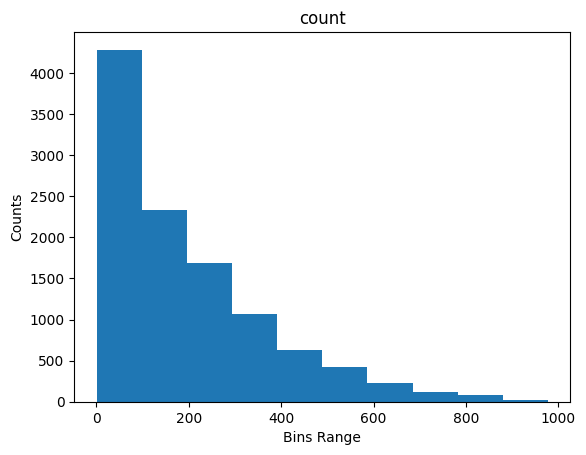

In [15]:
# Create a histogram of all features to show the distribution of each one relative to the data.
# This is part of the exploritory data analysis
for column in train.columns:
    plt.hist(train[column])
    plt.xlabel('Bins Range')
    plt.ylabel('Counts')
    plt.title(column)
    plt.show()
    print()

In [16]:
# create a new feature
train['hour'] = train['datetime'].dt.hour
train['day'] = train['datetime'].dt.day
train['month'] = train['datetime'].dt.month
test['hour'] = test['datetime'].dt.hour
test['day'] = test['datetime'].dt.day
test['month'] = test['datetime'].dt.month

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [17]:
train['season'] = train['season'].astype('category')
train['weather'] = train['weather'].astype('category')
test['season'] = test['season'].astype('category')
test['weather'] = test['weather'].astype('category')

In [18]:
# View are new feature
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,hour,day,month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16,0,1,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32,2,1,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13,3,1,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1,4,1,1


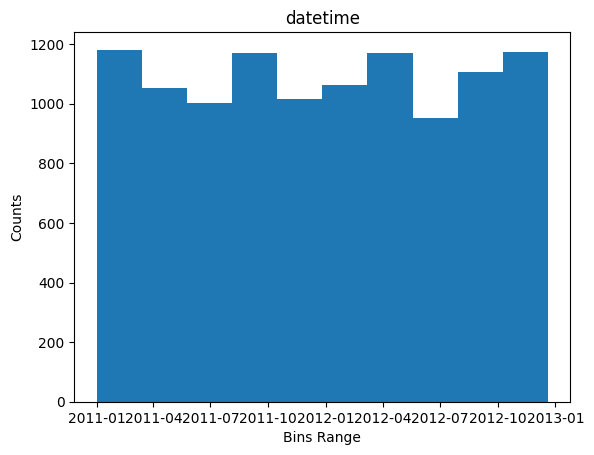

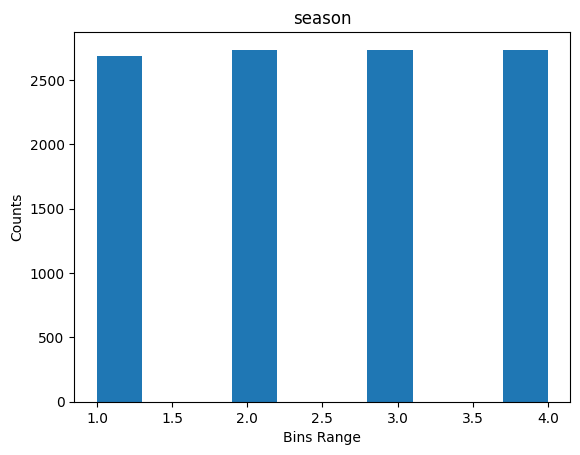

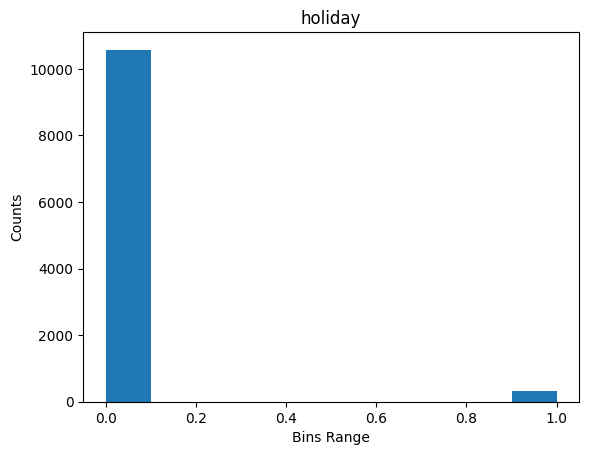

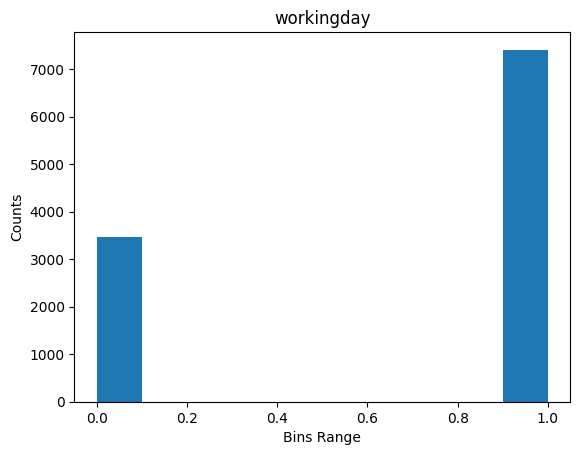

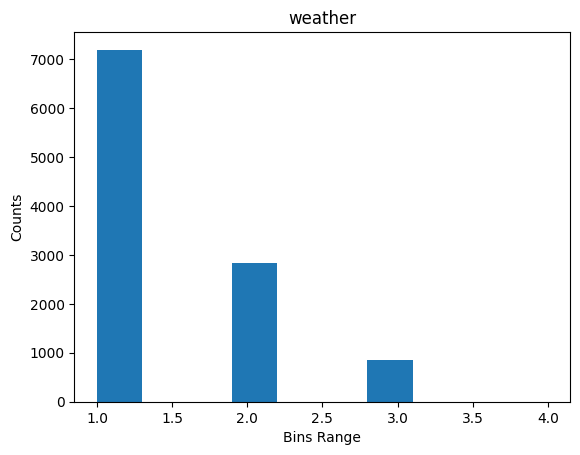

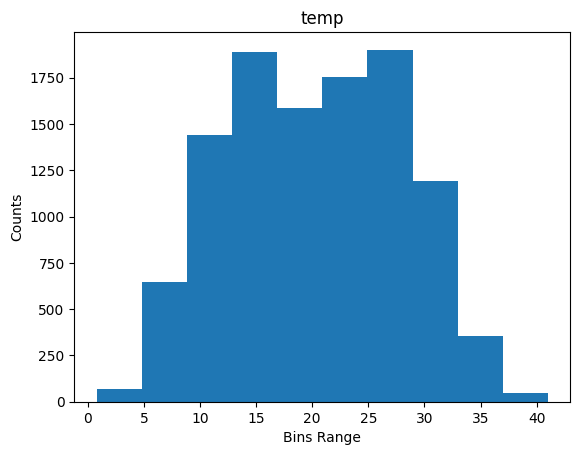

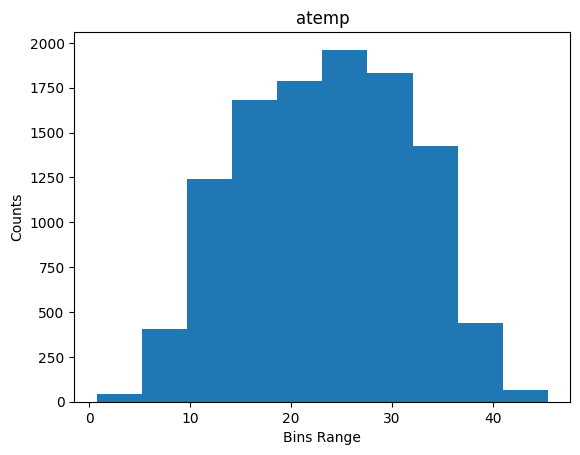

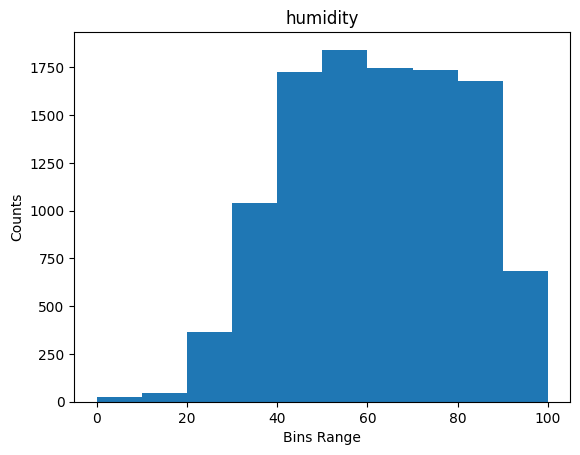

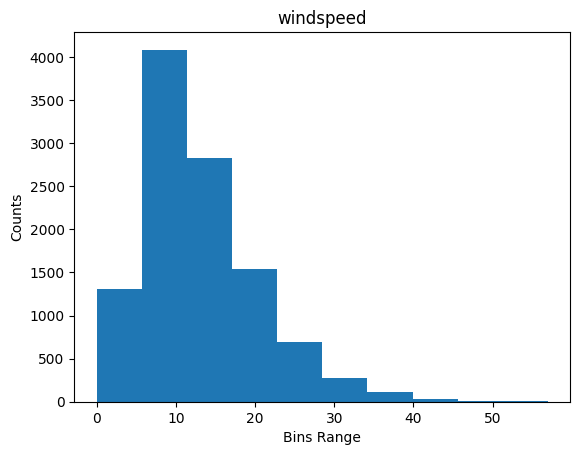

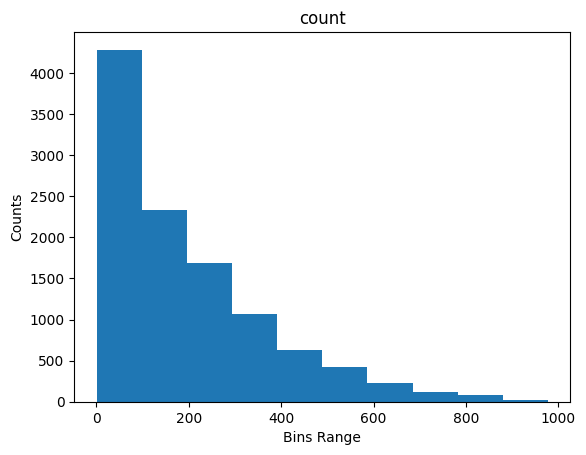

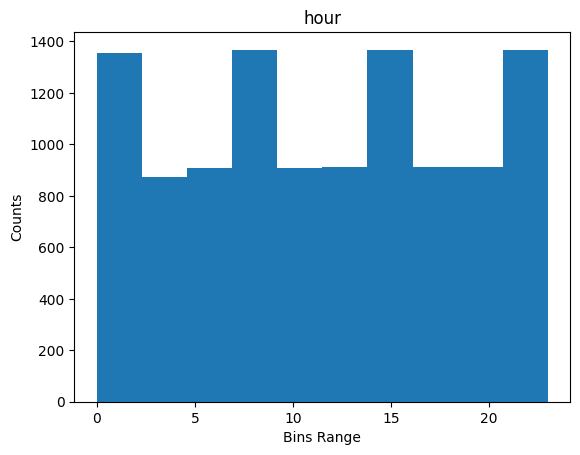

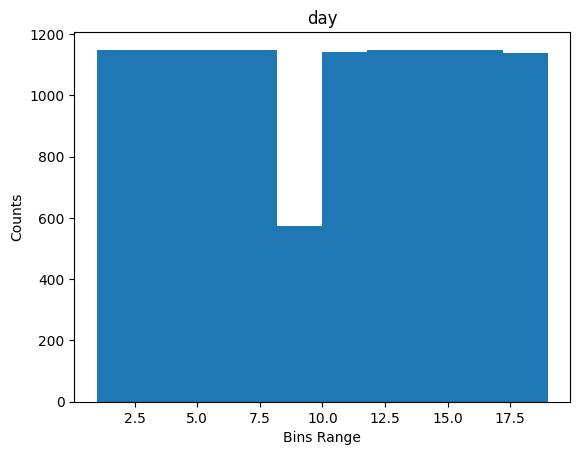

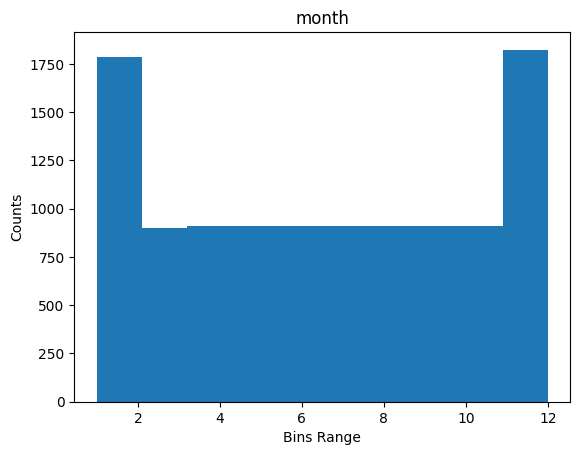

In [19]:
# View histogram of all features again now with the hour feature
for column in train.columns:
    plt.hist(train[column])
    plt.xlabel('Bins Range')
    plt.ylabel('Counts')
    plt.title(column)
    plt.show()
    print()

In [20]:
train.corr().round(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,hour,day,month
datetime,1.00,0.48,0.01,-0.00,-0.01,0.18,0.18,0.03,-0.09,0.31,-0.01,0.03,0.49
season,0.48,1.00,0.03,-0.01,0.01,0.26,0.26,0.19,-0.15,0.16,-0.01,0.00,0.97
holiday,0.01,0.03,1.00,-0.25,-0.01,0.00,-0.01,0.00,0.01,-0.01,-0.00,-0.02,0.00
workingday,-0.00,-0.01,-0.25,1.00,0.03,0.03,0.02,-0.01,0.01,0.01,0.00,0.01,-0.00
weather,-0.01,0.01,-0.01,0.03,1.00,-0.06,-0.06,0.41,0.01,-0.13,-0.02,-0.01,0.01
temp,0.18,0.26,0.00,0.03,-0.06,1.00,0.98,-0.06,-0.02,0.39,0.15,0.02,0.26
atemp,0.18,0.26,-0.01,0.02,-0.06,0.98,1.00,-0.04,-0.06,0.39,0.14,0.01,0.26
humidity,0.03,0.19,0.00,-0.01,0.41,-0.06,-0.04,1.00,-0.32,-0.32,-0.28,-0.01,0.20
windspeed,-0.09,-0.15,0.01,0.01,0.01,-0.02,-0.06,-0.32,1.00,0.10,0.15,0.04,-0.15
count,0.31,0.16,-0.01,0.01,-0.13,0.39,0.39,-0.32,0.10,1.00,0.40,0.02,0.17


## Step 5: Rerun the model with the same settings as before, just with more features

In [21]:
predictor_new_features = TabularPredictor(
    label='count',
    problem_type='regression',
    eval_metric='root_mean_squared_error',
    path='new_feature_models',
).fit(
    train_data=train,
    time_limit=60*10,
    presets='best_quality'
)

Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.4.0
Python Version:     3.12.11
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 25.0.0: Wed Sep 17 21:41:23 PDT 2025; root:xnu-12377.1.9~141/RELEASE_ARM64_T8122
CPU Count:          8
Memory Avail:       2.54 GB / 8.00 GB (31.7%)
Disk Space Avail:   45.05 GB / 228.27 GB (19.7%)
Presets specified: ['best_quality']
Using hyperparameters preset: hyperparameters='zeroshot'
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Co

In [22]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model  score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3 -31.858240  root_mean_squared_error      45.061812  354.724118                0.000628           0.098928            3       True         16
1      WeightedEnsemble_L2 -32.065807  root_mean_squared_error      41.876200  239.444446                0.000789           0.049717            2       True          8
2     ExtraTreesMSE_BAG_L2 -32.330673  root_mean_squared_error      43.273592  270.721272                0.604604           5.441886            2       True         13
3          CatBoost_BAG_L2 -32.334666  root_mean_squared_error      42.744935  297.650168                0.075947          32.370782            2       True         12
4   NeuralNetFastAI_BAG_L2 -32.532510  root_mean_squared_error      43.932820  303.967141         

/opt/anaconda3/envs/autogluon-test/lib/python3.12/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L2': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L2': 'StackerEnsembleModel_XGBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBMXT_BAG_L1': np.float64(-34.51903091052072),
  'LightGBM_BAG_L1': np.float64(-33.91692018

In [23]:
predictions_new_features = predictor_new_features.predict(test)

In [24]:
# Remember to set all negative values to zero
predictions_new_features[predictions_new_features < 0] = 0

In [25]:
# Same submitting predictions
submission_new_features = pd.read_csv('sampleSubmission.csv')
submission_new_features['datetime'] = pd.to_datetime(submission['datetime'])
submission_new_features["count"] = predictions_new_features
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [26]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100%|████████████████████████████████████████| 188k/188k [00:02<00:00, 72.0kB/s]
Successfully submitted to Bike Sharing Demand

In [27]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                        description           status                     publicScore  privateScore  
---------------------------  --------------------------  --------------------  -------------------------  -----------  ------------  
submission_new_features.csv  2025-09-30 06:09:54.467000  new features          SubmissionStatus.COMPLETE  0.48565      0.48565       
submission.csv               2025-09-30 05:54:53.887000  first raw submission  SubmissionStatus.COMPLETE  1.40096      1.40096       


#### New Score of `0.48565`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [28]:
GBM = {
        'max_depth' : 8,
        'n_estimators' : 80,
        'learning_rate': 0.01,
        'min_data_in_leaf': 25
}

XGB = {
        'n_estimators' : 110,
        'max_depth' : 10,
        'learning_rate': 0.01,
        'min_child_weight' : 0.4
    
}

RF = {
        'n_estimators': 95,
        'max_depth': 9
}

hyperparameter = {
    'GBM' : GBM,
    'XGB' : XGB,
    'RF' : RF,
}

hyperparameter_tune_kwargs = {
    'num_trails' : 5,
    'scheduler' : 'local',
    'searcher' : 'auto'
}

In [29]:
predictor_new_hpo = TabularPredictor(
    label='count',
    problem_type='regression',
    eval_metric='root_mean_squared_error',
    path='hyperparameter_models',
).fit(
    train_data=train,
    time_limit=60*10,
    presets='best_quality',
    hyperparameters=hyperparameter,
    hyperparameter_tune_kwargs=hyperparameter_tune_kwargs
)

Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.4.0
Python Version:     3.12.11
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 25.0.0: Wed Sep 17 21:41:23 PDT 2025; root:xnu-12377.1.9~141/RELEASE_ARM64_T8122
CPU Count:          8
Memory Avail:       2.43 GB / 8.00 GB (30.4%)
Disk Space Avail:   43.70 GB / 228.27 GB (19.1%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be fit on subsets of the data. The

In [30]:
predictor_new_hpo.fit_summary()['leaderboard']

*** Summary of fit() ***
Estimated performance of each model:
                  model   score_val              eval_metric  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L3  -42.753753  root_mean_squared_error       2.929793  62.517383                0.000500           0.087079            3       True         47
1   RandomForest_BAG_L2  -42.796405  root_mean_squared_error       2.929293  62.430304                0.106531           3.989063            2       True         39
2   WeightedEnsemble_L2  -50.979252  root_mean_squared_error       0.459440   7.921189                0.001882           0.124126            2       True         30
3   RandomForest_BAG_L1  -51.003337  root_mean_squared_error       0.131467   1.347605                0.131467           1.347605            1       True         16
4     XGBoost_BAG_L2/T6  -73.085188  root_mean_squared_error       4.101057  73.195215                1.278295   

/opt/anaconda3/envs/autogluon-test/lib/python3.12/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L3,-42.753753,root_mean_squared_error,2.929793,62.517383,0.000500,0.087079,3,True,47
1,RandomForest_BAG_L2,-42.796405,root_mean_squared_error,2.929293,62.430304,0.106531,3.989063,2,True,39
2,WeightedEnsemble_L2,-50.979252,root_mean_squared_error,0.459440,7.921189,0.001882,0.124126,2,True,30
3,RandomForest_BAG_L1,-51.003337,root_mean_squared_error,0.131467,1.347605,0.131467,1.347605,1,True,16
4,XGBoost_BAG_L2/T6,-73.085188,root_mean_squared_error,4.101057,73.195215,1.278295,14.753974,2,True,45
5,XGBoost_BAG_L2/T2,-73.092382,root_mean_squared_error,3.467835,71.176946,0.645073,12.735705,2,True,41
6,XGBoost_BAG_L2/T5,-73.092382,root_mean_squared_error,3.633644,68.677656,0.810881,10.236415,2,True,44
7,XGBoost_BAG_L2/T7,-73.112265,root_mean_squared_error,3.439268,69.818697,0.616505,11.377456,2,True,46
8,XGBoost_BAG_L2/T4,-73.116394,root_mean_squared_error,3.533110,68.013133,0.710348,9.571892,2,True,43
9,XGBoost_BAG_L2/T3,-73.156770,root_mean_squared_error,3.220281,69.793396,0.397519,11.352155,2,True,42


In [31]:
predictions_new_hpo = predictor_new_hpo.predict(test)

In [32]:
# Remember to set all negative values to zero
predictions_new_hpo[predictions_new_hpo < 0] = 0

In [33]:
# Same submitting predictions
submission_new_hpo = pd.read_csv('sampleSubmission.csv')
submission_new_hpo['datetime'] = pd.to_datetime(submission['datetime'])
submission_new_hpo["count"] = predictions_new_hpo
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [34]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100%|████████████████████████████████████████| 188k/188k [00:02<00:00, 90.6kB/s]
Successfully submitted to Bike Sharing Demand

In [35]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                        description                        status                     publicScore  privateScore  
---------------------------  --------------------------  ---------------------------------  -------------------------  -----------  ------------  
submission_new_hpo.csv       2025-09-30 06:18:47.543000  new features with hyperparameters  SubmissionStatus.COMPLETE  0.48462      0.48462       
submission_new_features.csv  2025-09-30 06:09:54.467000  new features                       SubmissionStatus.COMPLETE  0.48565      0.48565       
submission.csv               2025-09-30 05:54:53.887000  first raw submission               SubmissionStatus.COMPLETE  1.40096      1.40096       


#### New Score of `0.48462`

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

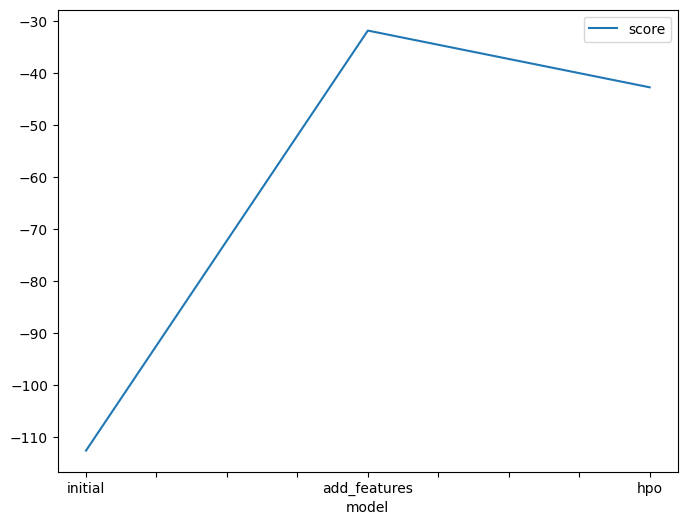

In [36]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [-112.55, -31.85, -42.75]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

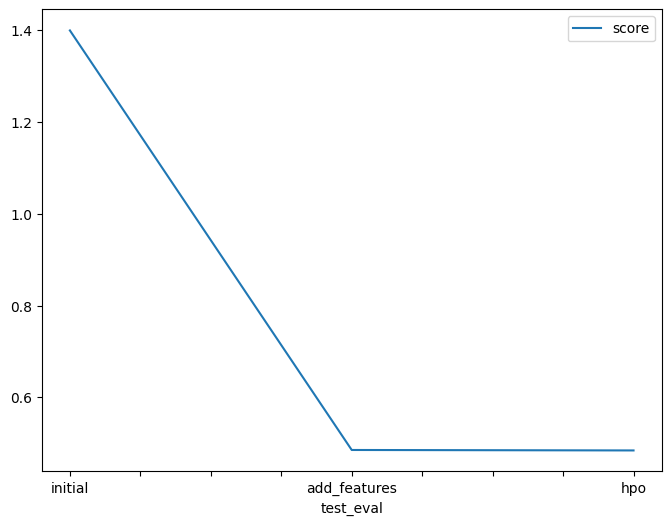

In [37]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.400, 0.485, 0.484]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [39]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "RF-n_estimators": ['default', 'default', 95],
    "GBM-max_depth": ['default', 'default', 8],
    "XGM-learning_rate": ['default', 'default', 0.01],
    "score": [1.400, 0.485, 0.484]
})

,model,RF-n_estimators,GBM-max_depth,XGM-learning_rate,score
0,initial,default,default,default,1.400
1,add_features,default,default,default,0.485
2,hpo,95,8,0.01,0.484
